In [2]:
%matplotlib inline

import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\abc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#下载MNIST数据集并生成DataSet对象
#使用OneHot编码处理标记
mnist = input_data.read_data_sets('F:/日常文档/大三下/深度学习/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting F:/日常文档/大三下/深度学习/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting F:/日常文档/大三下/深度学习/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting F:/日常文档/大三下/深度学习/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting F:/日常文档/大三下/深度学习/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.labels.shape

(55000, 10)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.test.labels.shape

(10000, 10)

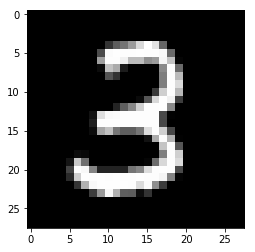

In [8]:
plt.imshow(Image.fromarray((mnist.train.images[11]*255).reshape([28,28])))

In [9]:
mnist.train.labels[11]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [13]:
with tf.Graph().as_default() as g:
    #输入、标记占位符
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    #创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784,128]),name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]),name='hidden_bias')
     #隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs,hidden_weight) + hidden_bias)
    
    #创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128,10]),name='output_weight')
    output_bias = tf.Variable(tf.zeros([10, ]),name='output_bias')
    
    #输出层前向传播
    logits = tf.matmul(hidden_output,output_weight) + output_bias
    output = tf.nn.softmax(logits)  #[None,10]
    
    #代价函数
    loss =tf.reduce_mean(
        -1*tf.reduce_sum(
            labels * tf.log(output + 1e-17),
            axis = 1))
    
    #正确率
    acc =tf.reduce_mean(
        tf.cast(
            tf.equal(
                tf.argmax(output,axis=1),
                tf.argmax(labels,axis=1)),
                tf.float32))
with tf.Session(graph=g) as sess:
    #定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    #训练模型
    for step in range(20000):
        batch_images,batch_labels = mnist.train.next_batch(32)
        res_loss,_ = sess.run([loss,train_op],feed_dict={
            inputs:batch_images,
            labels:batch_labels
        })
        
        #输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images,batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc,feed_dict={
                    inputs:batch_images,
                    labels:batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d,loss %2.4f, acc %.4f' %(step,res_loss,accs))

step     0,loss 31.1019, acc 0.1111
step   500,loss 19.4730, acc 0.4788
step  1000,loss 18.5386, acc 0.5924
step  1500,loss 14.4008, acc 0.6850
step  2000,loss 11.5863, acc 0.7351
step  2500,loss 4.4961, acc 0.7998
step  3000,loss 2.7023, acc 0.8423
step  3500,loss 2.5011, acc 0.8538
step  4000,loss 3.2898, acc 0.8636
step  4500,loss 2.7894, acc 0.8691
step  5000,loss 4.9575, acc 0.8748
step  5500,loss 1.5677, acc 0.8785
step  6000,loss 1.3145, acc 0.8843
step  6500,loss 3.9723, acc 0.8881
step  7000,loss 1.4229, acc 0.8878
step  7500,loss 0.1226, acc 0.8924
step  8000,loss 2.0991, acc 0.8932
step  8500,loss 1.2232, acc 0.8958
step  9000,loss 2.7635, acc 0.8994
step  9500,loss 1.2259, acc 0.8989
step 10000,loss 5.3794, acc 0.9001
step 10500,loss 2.2653, acc 0.9049
step 11000,loss 1.8009, acc 0.9015
step 11500,loss 0.7925, acc 0.9079
step 12000,loss 2.2734, acc 0.9082
step 12500,loss 2.8951, acc 0.9077
step 13000,loss 1.1428, acc 0.9104
step 13500,loss 2.9132, acc 0.9097
step 14000,loss